In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/thomasttam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Import Cleaned Data

In [1]:
data = pd.read_csv('cleaned_data.csv',index_col=0)

NameError: name 'pd' is not defined

In [3933]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19087 non-null  float64
 1   bedrooms       19087 non-null  int64  
 2   bathrooms      19087 non-null  float64
 3   sqft_living    19087 non-null  int64  
 4   sqft_lot       19087 non-null  int64  
 5   floors         19087 non-null  float64
 6   waterfront     19087 non-null  int64  
 7   view           19087 non-null  int64  
 8   condition      19087 non-null  int64  
 9   sqft_above     19087 non-null  int64  
 10  sqft_basement  19087 non-null  float64
 11  yr_built       19087 non-null  int64  
 12  zipcode        19087 non-null  int64  
 13  lat            19087 non-null  float64
 14  long           19087 non-null  float64
 15  sqft_living15  19087 non-null  int64  
 16  sqft_lot15     19087 non-null  int64  
 17  quarter_sold   19087 non-null  int64  
 18  year_s

In [3934]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,decade_built,grade_binned,renovated,basement
0,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,2170,400.00000,1951,98125,47.72100,-122.31900,1690,7639,4,2014,1950,Fair,1,1
1,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,770,0.00000,1933,98028,47.73790,-122.23300,2720,8062,1,2015,1930,Fair,0,0
2,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,1050,910.00000,1965,98136,47.52080,-122.39300,1360,5000,4,2014,1960,Fair,0,1
3,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,1680,0.00000,1987,98074,47.61680,-122.04500,1800,7503,1,2015,1980,Fair,0,0
4,1230000.00000,4,4.50000,5420,101930,1.00000,0,0,3,3890,1530.00000,2001,98053,47.65610,-122.00500,4760,101930,2,2014,2000,Good,0,1


# 2. Feature Engineering

In addition to month_sold, year_sold, decade, and city we want to add new features to further increase the model.
* **total_sqft**: sqft_living + sqft_lot
* **total_sqft_inside**: sqft_above + sqft_basement
* **age_when_sold**: yr_sold - yr_built
* **city**: location of the house based on zipcode

## Total Square Feet

Description: Total square feet of all property, house and lot

In [3935]:
# create total_sqft column
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']

total_sqft_values = data['total_sqft'].count()
total_sqft_nunique = data['total_sqft'].nunique()
total_sqft_missing_values = data['total_sqft'].isna().sum()

print(f'Number of values: {total_sqft_values}')
print(f'Number of unique values: {total_sqft_nunique}')
print(f'Missing values: {total_sqft_missing_values}')

Number of values: 19087
Number of unique values: 10322
Missing values: 0


## Total Square Feet Inside

Description: Total square feet of only the house

In [3936]:
# create total_sqft_inside column
data['total_sqft_inside'] = data['sqft_above'] + data['sqft_basement']

total_sqft_inside_values = data['total_sqft_inside'].count()
total_sqft_inside_nunique = data['total_sqft_inside'].nunique()
total_sqft_inside_missing_values = data['total_sqft_inside'].isna().sum()

print(f'Number of values: {total_sqft_inside_values}')
print(f'Number of unique values: {total_sqft_inside_nunique}')
print(f'Missing values: {total_sqft_inside_missing_values}')

Number of values: 19087
Number of unique values: 990
Missing values: 0


In [3937]:
pd.concat([data['total_sqft_inside'].value_counts(dropna=False),
           round((data['total_sqft_inside'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,total_sqft_inside,%
1300.00000,125,0.65000
1400.00000,121,0.63000
1440.00000,120,0.63000
1820.00000,116,0.61000
1320.00000,113,0.59000
...,...,...
3135.00000,1,0.01000
1767.00000,1,0.01000
1315.00000,1,0.01000
2253.00000,1,0.01000


In [3938]:
# remove basement column
data = data.drop(['sqft_basement'],axis = 1)

## Age When Sold

Description: the age of the house when it was sold, year_sold - yr_built

In [3939]:
data['age_when_sold'] = data['year_sold'] - data['yr_built']

age_when_sold_values = data['age_when_sold'].count()
age_when_sold_nunique = data['age_when_sold'].nunique()
age_when_sold_missing_values = data['age_when_sold'].isna().sum()

print(f'Number of values: {age_when_sold_values}')
print(f'Number of unique values: {age_when_sold_nunique}')
print(f'Missing values: {age_when_sold_missing_values}')

Number of values: 19087
Number of unique values: 117
Missing values: 0


In [3940]:
pd.concat([data['age_when_sold'].value_counts(dropna=False),
           round((data['age_when_sold'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,age_when_sold,%
9,423,2.22000
0,388,2.03000
8,383,2.01000
11,375,1.96000
10,367,1.92000
...,...,...
113,26,0.14000
115,20,0.10000
81,19,0.10000
80,18,0.09000


In [3941]:
# got values with -1 results which means the house was sold before it was even built
    # replacing -1 values with 0
data['age_when_sold'] = data['age_when_sold'].replace(-1,0)

In [3942]:
# remove yr_built column
data = data.drop(['yr_built'],axis = 1)

## City

There are many unique values for zipcodes in which I decided to combine the zip codes by their city. I didn't have the zip code data for King County so I had to web scrape from zip-codes.com website to get the zip code and the respective city.

In [3943]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.zip-codes.com/county/wa-king.asp#zipcodes'
page = requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')
tb = soup.find('table',class_='statTable')

list_zip_codes = []
for link in tb.find_all('td'):
    zip_code = link.find('a')
    if zip_code is None:
        continue
    list_zip_codes.append(zip_code.get_text('title'))

zip_code_df = pd.concat([pd.Series([list_zip_codes[i][-5:] for i in range(0,len(list_zip_codes),2)]).astype('int64'),
                         pd.Series([list_zip_codes[i] for i in range(1,len(list_zip_codes),2)])],axis=1).rename(columns={0:'zipcode',1:'city'})
zip_code_df.head()

,zipcode,city
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [3944]:
data = pd.merge(data,zip_code_df,on='zipcode',how='inner')

In [3945]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,decade_built,grade_binned,renovated,basement,total_sqft,total_sqft_inside,age_when_sold,city
0,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,2170,98125,47.72100,-122.31900,1690,7639,4,2014,1950,Fair,1,1,9812,2570.00000,63,Seattle
1,571000.00000,4,2.00000,2750,7807,1.50000,0,0,5,2250,98125,47.71680,-122.28700,1510,7807,2,2014,1910,Fair,0,1,10557,2750.00000,98,Seattle
2,315000.00000,3,1.00000,960,6634,1.00000,0,0,3,960,98125,47.72640,-122.31000,1570,7203,2,2014,1950,Fair,0,0,7594,960.00000,62,Seattle
3,382500.00000,2,1.00000,1190,4440,1.00000,0,0,3,1190,98125,47.71350,-122.28700,1060,5715,3,2014,1980,Fair,0,0,5630,1190.00000,33,Seattle
4,425000.00000,3,1.75000,2500,6840,1.00000,0,0,3,1300,98125,47.72220,-122.32000,1580,8691,3,2014,1950,Fair,0,1,9340,2500.00000,57,Seattle


In [3946]:
pd.concat([data['city'].value_counts(dropna=False),
           round((data['city'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,city,%
Seattle,7906,41.42000
Renton,1394,7.30000
Bellevue,1246,6.53000
Kent,1075,5.63000
Redmond,863,4.52000
Kirkland,857,4.49000
Auburn,814,4.26000
Sammamish,704,3.69000
Federal Way,692,3.63000
Issaquah,663,3.47000


In [3947]:
data['city'] = data['city'].apply(lambda x: x.replace(' ',''))

In [3948]:
data['city'] = data['city'].astype('category')

In [3949]:
# removing zip code since it got replaced by city
data = data.drop(['zipcode'],axis=1)

# 3. Check Multicollinearity

In [3950]:
pd.set_option('display.max_columns',100)
data_corr = data.corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,decade_built,renovated,basement,total_sqft,total_sqft_inside,age_when_sold
price,1.00000,0.31808,0.52679,0.70408,0.08597,0.25638,0.27685,0.39302,0.03646,0.60825,0.30466,0.01918,0.58067,0.08058,-0.00674,0.00346,0.05240,0.11112,0.17564,0.10144,0.70223,-0.05081
bedrooms,0.31808,1.00000,0.53199,0.59572,0.03072,0.18891,-0.00240,0.08653,0.02079,0.49605,-0.01480,0.13665,0.40702,0.02904,-0.00337,-0.00823,0.16280,0.01660,0.15837,0.04398,0.59258,-0.16309
bathrooms,0.52679,0.53199,1.00000,0.75617,0.08470,0.50552,0.06729,0.18540,-0.12883,0.68781,0.02436,0.22229,0.56953,0.08562,0.01077,-0.02754,0.50476,0.04319,0.15937,0.10134,0.75362,-0.50656
sqft_living,0.70408,0.59572,0.75617,1.00000,0.17261,0.35614,0.11033,0.28455,-0.05930,0.87759,0.05223,0.23800,0.75544,0.18244,0.01467,-0.02979,0.31649,0.04541,0.19756,0.19436,0.99637,-0.31652
sqft_lot,0.08597,0.03072,0.08470,0.17261,1.00000,-0.00776,0.02311,0.07093,-0.01463,0.18356,-0.08633,0.23008,0.14554,0.72291,-0.00481,0.00680,0.05684,0.00293,-0.03683,0.99976,0.17241,-0.05543
floors,0.25638,0.18891,0.50552,0.35614,-0.00776,1.00000,0.02168,0.02783,-0.26621,0.52455,0.05038,0.12669,0.27977,-0.01130,0.01547,-0.02094,0.48963,-0.00072,-0.24975,0.00027,0.35932,-0.49010
waterfront,0.27685,-0.00240,0.06729,0.11033,0.02311,0.02168,1.00000,0.40595,0.01759,0.07544,-0.01287,-0.04011,0.08895,0.03196,0.00887,-0.00555,-0.02578,0.07967,0.04170,0.02549,0.11030,0.02628
view,0.39302,0.08653,0.18540,0.28455,0.07093,0.02783,0.40595,1.00000,0.04675,0.16783,0.01018,-0.07831,0.27511,0.07105,-0.00655,-0.00033,-0.05691,0.08884,0.17458,0.07703,0.28207,0.05751
condition,0.03646,0.02079,-0.12883,-0.05930,-0.01463,-0.26621,0.01759,0.04675,1.00000,-0.15835,-0.01859,-0.10663,-0.09435,-0.00598,0.01764,-0.04648,-0.36637,-0.05471,0.12857,-0.01591,-0.06267,0.36385
sqft_above,0.60825,0.49605,0.68781,0.87759,0.18356,0.52455,0.07544,0.16783,-0.15835,1.00000,0.00170,0.34163,0.73313,0.19203,0.01509,-0.02493,0.42254,0.01705,-0.20766,0.20252,0.87910,-0.42120


In [3951]:
data_corr_boolean = abs(data.corr()) > 0.75
data_corr_boolean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,decade_built,renovated,basement,total_sqft,total_sqft_inside,age_when_sold
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
sqft_living,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


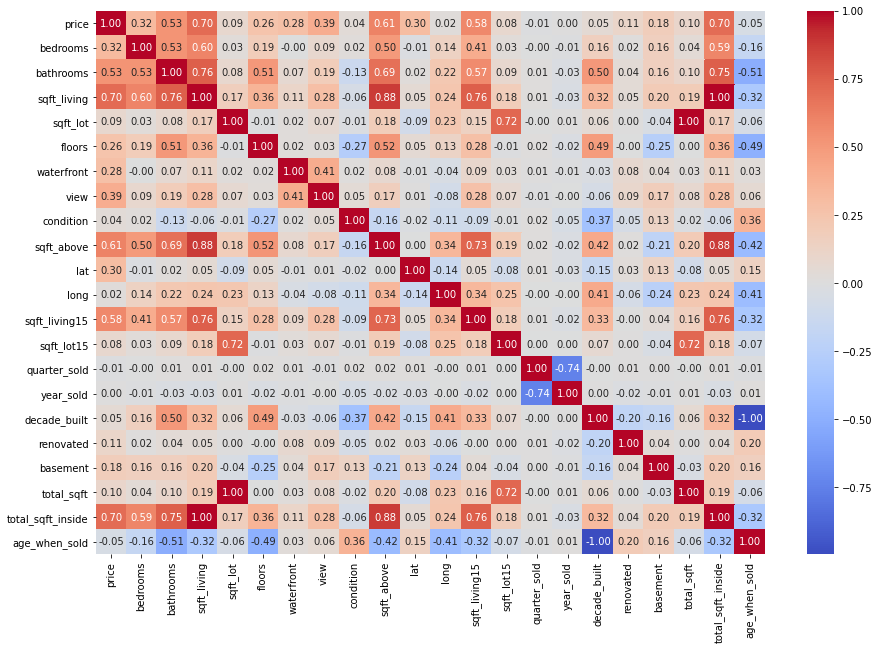

In [3952]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# 4. Convert Categorical Columns

In [3953]:
continuous = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15','age_when_sold','total_sqft_inside','total_sqft']
discrete = ['bedrooms','bathrooms','floors']
categorical = ['waterfront','view','condition','quarter_sold','year_sold','decade_built','renovated','grade_binned','city','basement']

In [3954]:
# convert categorical columns to category
for column in data[categorical]:
    data[column] = data[column].astype('category')

In [3955]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              19087 non-null  float64 
 1   bedrooms           19087 non-null  int64   
 2   bathrooms          19087 non-null  float64 
 3   sqft_living        19087 non-null  int64   
 4   sqft_lot           19087 non-null  int64   
 5   floors             19087 non-null  float64 
 6   waterfront         19087 non-null  category
 7   view               19087 non-null  category
 8   condition          19087 non-null  category
 9   sqft_above         19087 non-null  int64   
 10  lat                19087 non-null  float64 
 11  long               19087 non-null  float64 
 12  sqft_living15      19087 non-null  int64   
 13  sqft_lot15         19087 non-null  int64   
 14  quarter_sold       19087 non-null  category
 15  year_sold          19087 non-null  category
 16  deca

## Dummy Variables

Categorical variables need to be transformed which I created dummy variables for each of the categorical columns. I first created a separate dataframe for the dummies and then concatenated with the original dataset.

In [3956]:
dummies_to_create = data.loc[:, (data.dtypes != np.float64) & (data.dtypes != np.int64)]
dummies_to_create.head()

,waterfront,view,condition,quarter_sold,year_sold,decade_built,grade_binned,renovated,basement,city
0,0,0,3,4,2014,1950,Fair,1,1,Seattle
1,0,0,5,2,2014,1910,Fair,0,1,Seattle
2,0,0,3,2,2014,1950,Fair,0,0,Seattle
3,0,0,3,3,2014,1980,Fair,0,0,Seattle
4,0,0,3,3,2014,1950,Fair,0,1,Seattle


In [3957]:
# create dummies into a single dataframe
# drop_first is to avoid the dummy variable trap of multicollinearity
    # you can perfectly predict what one variable will be using some combination of the other variables
dummy_data = pd.get_dummies(dummies_to_create,drop_first=True)

In [3958]:
# drop categorical columns since we created the dummy variables
data = data.drop(columns=['renovated', 'waterfront', 'view', 'condition', 'quarter_sold','year_sold', 'decade_built',
                          'grade_binned','city','basement'],axis=1)

In [3959]:
dummy_data.head()

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 5. Export Dummy Data

In [3963]:
dummy_data.to_csv('dummy_data.csv')

In [3964]:
data.to_csv('added_features_data.csv')